In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class nueral_network:
    
    #######################################################################
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning_rate):
        
        # specify number of nodes in each level
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learning_rate
        self.activation_function = lambda x: scipy.special.expit(x)
        
        # create weight matrices
        # Hidden input weight matrix 2nd_level*1st_level 
        self.whi = numpy.random.rand(self.hnodes, self.inodes) - 0.5
        # Hidden output weight matrix 3rd_level*2nd_level
        self.who = numpy.random.rand(self.onodes,self.hnodes) - 0.5
        
        # Normal distribution
        #self.whi = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        #self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        pass
    
    ##################################################################
    
    def train(self, inputs_list, targets_list):
        
        inputs = numpy.array( inputs_list, ndmin=2).T
        targets = numpy.array( targets_list, ndmin=2).T
        
        # hidden input X = W. I Initial Weight dot product Inputs
        hidden_inputs = numpy.dot(self.whi,inputs)
        # apply activation function(sigmoid) to get hidden output
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # again doing same for next layer
        final_inputs = numpy.dot( self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # Final Error = target -Output
        output_errors = targets - final_outputs
        # hidden layer errors = transpose of hidden o/p weights dot o/p error
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        
        # update weights
        # for 3-2 layer
        #self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # for 2-1 layer
        #self.whi += self.lr * numpy.dot( (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)) , numpy.transpose(inputs))

        self.whi += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
       
        pass
    
    
    ##################################################################
    
    def query(self, inputs_list):
    
        #convert list to 2D-array
        inputs = numpy.array( inputs_list, ndmin=2).T
        
        #hidden input X = W. I Initial Weight dot product Inputs
        hidden_inputs = numpy.dot(self.whi,inputs)
        #apply activation function(sigmoid) to get hidden output
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #again doing same for next layer
        final_inputs = numpy.dot( self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
  
        return final_outputs
    

In [3]:
#Creating nueral network
inputnodes = 784
hiddennodes = 100
outputnodes = 10
learningrate = 0.3
n = nueral_network(inputnodes, hiddennodes, outputnodes, learningrate)

In [4]:
data_file = open ('mnist_train_100.csv','r')
data_list = data_file.readlines()


In [5]:
data_list[2]


'4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0,0,0,0,46,245,163,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0,0,0,0,0,0,0,120,254,163,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0,0,0,0,0,0,0,159,254,120,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0,0,0,0,0,0,0,159,254,67,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0,0,0,0,0,0,0,159,254,85,0,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0,0,0,0,0,0,0,150,253,237,207,207,207,253,254,250,2

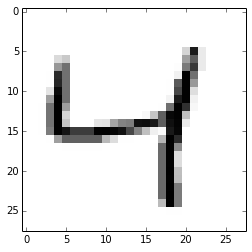

In [6]:
all_values = data_list[2].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [7]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [8]:
print(targets)


[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]


In [9]:
for record in data_list:
    all_values = record.split(',')
    #scaling input from 0 - 255 to 0.1 - 0.99, avoid 0 and 1
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    targets = numpy.zeros(outputnodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [17]:
targets

array([ 0.01,  0.99,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

In [8]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()

In [15]:
all_values = test_data_list[8].split(',')
all_values[0]

'5'

In [10]:
outputs = n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01)
label = numpy.argmax(outputs)
print("networks answer: ", label)
print("correct answer: ", int(all_values[0]))
if(label == int(all_values[0])):
    print("Correct!")
else:
    print("Wrong!")

('networks answer: ', 1)
('correct answer: ', 1)
Correct!


In [45]:
all_values[0]

'1'